In [28]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import matplotlib.pyplot as plt


In [19]:
smile = pd.read_csv('SmileOn11.28.2020.csv', skiprows=2,
                    sep=None, error_bad_lines=False,skipinitialspace=True)
smile.head()

<ipython-input-19-94cf67c01a06>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  smile = pd.read_csv('SmileOn11.28.2020.csv', skiprows=2,


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes


In [20]:
smile.tail()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
40027,53192452,SMILE ON 60+ Registration,NaN,5/23/2018 14:11,5/23/2018 14:11,0,-1,60132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40028,67915561,SMILE ON 60+ Registration,NaN,5/15/2018 9:06,5/15/2018 9:10,4,3239813,128174,NaN,NaN,...,NaN,NaN,Church Health Center - Memphis,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40029,67251405,SMILE ON 60+ Clinical,NaN,5/10/2018 8:25,5/10/2018 8:26,1,2631417,131347,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,Not available,No,Yes,Yes,NaN,NaN
40030,63063150,SMILE ON 60+ Clinical,NaN,5/1/2018 8:14,5/1/2018 8:24,10,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40031,70839903,SMILE ON 60+ Clinical,NaN,2/14/2018 8:10,2/14/2018 8:18,8,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
smile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40032 entries, 0 to 40031
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 56.2+ MB


In [22]:
smile.isnull().sum()

CallReportNum                                                                                                                                                                  0
ReportVersion                                                                                                                                                                  0
LinkedToCallReportNum                                                                                                                                                      40031
CallDateAndTimeStart                                                                                                                                                           0
CallDateAndTimeEnd                                                                                                                                                             0
                                                                                                                   

## Counting the individual patients 

In [23]:
smile.CallerNum.value_counts()

-1          70
 2441776    36
 2431132    31
 2416076    29
 2466994    28
            ..
 3825101     1
 3743280     1
 2653820     1
 3686036     1
 3821558     1
Name: CallerNum, Length: 8708, dtype: int64

In [24]:
smile.CallerNum.nunique()

8708

In [25]:
smile.describe()

,CallReportNum,LinkedToCallReportNum,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,...,SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Maxillary Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMILE ON 60+ Oral Care Encounter - 7972 - Quantity,SMILE ON 60+ Oral Care Encounter - 9110 - Quantity,SMILE ON 60+ Oral Care Encounter - 9951 - Quantity,SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Maxillary Quantity,SMILE ON 60+ Screening - # of Lower Natural Teeth,SMILE ON 60+ Screening - # of Upper Natural Teeth
count,4.003200e+04,1.0,40032.000000,4.003200e+04,40032.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,14.000000,48.0,0.0,0.0,4583.00000,3934.000000
mean,6.811432e+07,-1.0,4.706810,2.827383e+06,122879.506170,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.071429,1.0,NaN,NaN,10.10648,9.789019
std,6.862238e+06,NaN,11.822699,3.605287e+05,12764.819302,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.267261,0.0,NaN,NaN,3.18319,3.544024
min,5.319245e+07,-1.0,0.000000,-2.000000e+00,-1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.000000,1.0,NaN,NaN,1.00000,1.000000
25%,6.291154e+07,-1.0,1.000000,2.567229e+06,118845.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.000000,1.0,NaN,NaN,8.00000,7.000000
50%,6.769168e+07,-1.0,1.000000,2.800698e+06,120318.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.000000,1.0,NaN,NaN,10.00000,10.000000
75%,7.248042e+07,-1.0,4.000000,2.999736e+06,133279.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.000000,1.0,NaN,NaN,13.00000,13.000000
max,8.138183e+07,-1.0,735.000000,3.859874e+06,152980.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,2.000000,1.0,NaN,NaN,16.00000,16.000000


## Dropping unnecessary columns round 1 

In [37]:
smile.drop(columns = ['CallDateAndTimeStart','CallDateAndTimeEnd','CallLength','WasRealCall','WasHangup','WasSexCall','WasWrongNumber','WasPrankCall','WasSilentCall','GeoCode','GeoAssignment','CensusDivision','CensusTrack','CensusReportingArea','211Region','ThirdPartyName','ThirdPartyOrganization','ThirdPartyPhoneNumber','ThirdPartyAddress','ThirdPartyCity','ThirdPartyCounty','ThirdPartyStateProvince','ThirdPartyPostalCode','VolunteerComments','TextField2','TextField3','TextField4','TextField5','TextField6','TextField7','TextField8','TextField9','TextField10','Supervisor','IPAddress','VolIdentifier','SMILE ON 60+ Oral Care Encounter - 1351 - Quantity','SMILE ON 60+ Oral Care Encounter - 1354 - Quantity','SMILE ON 60+ Oral Care Encounter - 2140 - Quantity','SMILE ON 60+ Oral Care Encounter - 2150 - Quantity','SMILE ON 60+ Oral Care Encounter - 2160 - Quantity','SMILE ON 60+ Oral Care Encounter - 2161 - Quantity','SMILE ON 60+ Oral Care Encounter - 220 - Quantity','SMILE ON 60+ Oral Care Encounter - 230 - Quantity','SMILE ON 60+ Oral Care Encounter - 2330 - Quantity','SMILE ON 60+ Oral Care Encounter - 2331 - Quantity','SMILE ON 60+ Oral Care Encounter - 2332 - Quantity','SMILE ON 60+ Oral Care Encounter - 2335 - Quantity','SMILE ON 60+ Oral Care Encounter - 2390 - Quantity','SMILE ON 60+ Oral Care Encounter - 2391 - Quantity','SMILE ON 60+ Oral Care Encounter - 2392 - Quantity','SMILE ON 60+ Oral Care Encounter - 2393 - Quantity','SMILE ON 60+ Oral Care Encounter - 2394 - Quantity','SMILE ON 60+ Oral Care Encounter - 2915 - Quantity','SMILE ON 60+ Oral Care Encounter - 2920 - Quantity','SMILE ON 60+ Oral Care Encounter - 2933 - Quantity','SMILE ON 60+ Oral Care Encounter - 2940 - Quantity','SMILE ON 60+ Oral Care Encounter - 2950 - Quantity','SMILE ON 60+ Oral Care Encounter - 2954 - Quantity','SMILE ON 60+ Oral Care Encounter - 2955 - Quantity','SMILE ON 60+ Oral Care Encounter - 2980 - Quantity','SMILE ON 60+ Oral Care Encounter - 3220 - Quantity','SMILE ON 60+ Oral Care Encounter - 4341 - Quantity','SMILE ON 60+ Oral Care Encounter - 4342 - Quantity','SMILE ON 60+ Oral Care Encounter - 6930 - Quantity','SMILE ON 60+ Oral Care Encounter - 6980 - Quantity','SMILE ON 60+ Oral Care Encounter - 7111 - Quantity','SMILE ON 60+ Oral Care Encounter - 7140 - Quantity','SMILE ON 60+ Oral Care Encounter - 7210 - Quantity','SMILE ON 60+ Oral Care Encounter - 7220 - Quantity','SMILE ON 60+ Oral Care Encounter - 7230 - Quantity','SMILE ON 60+ Oral Care Encounter - 7240 - Quantity','SMILE ON 60+ Oral Care Encounter - 7241 - Quantity','SMILE ON 60+ Oral Care Encounter - 7250 - Quantity','SMILE ON 60+ Oral Care Encounter - 7261 - Quantity','SMILE ON 60+ Oral Care Encounter - 7285 - Quantity','SMILE ON 60+ Oral Care Encounter - 7286 - Quantity','SMILE ON 60+ Oral Care Encounter - 7310 - Quantity','SMILE ON 60+ Oral Care Encounter - 7311 - Quantity','SMILE ON 60+ Oral Care Encounter - 7320 - Quantity','SMILE ON 60+ Oral Care Encounter - 7321 - Quantity','SMILE ON 60+ Oral Care Encounter - 7410 - Quantity','SMILE ON 60+ Oral Care Encounter - 7411 - Quantity','SMILE ON 60+ Oral Care Encounter - 7412 - Quantity','SMILE ON 60+ Oral Care Encounter - 7414 - Quantity','SMILE ON 60+ Oral Care Encounter - 7415 - Quantity','SMILE ON 60+ Oral Care Encounter - 7440 - Quantity','SMILE ON 60+ Oral Care Encounter - 7450 - Quantity','SMILE ON 60+ Oral Care Encounter - 7451 - Quantity','SMILE ON 60+ Oral Care Encounter - 7460 - Quantity','SMILE ON 60+ Oral Care Encounter - 7461 - Quantity','SMILE ON 60+ Oral Care Encounter - 7471 - Quantity','SMILE ON 60+ Oral Care Encounter - 7510 - Quantity','SMILE ON 60+ Oral Care Encounter - 7511 - Quantity','SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity','SMILE ON 60+ Oral Care Encounter - 7971 - Quantity','SMILE ON 60+ Oral Care Encounter - 7972 - Quantity','SMILE ON 60+ Oral Care Encounter - 9110 - Quantity','SMILE ON 60+ Oral Care Encounter - 9951 - Quantity'])


KeyError: "['CallDateAndTimeStart' 'CallDateAndTimeEnd' 'CallLength' 'WasRealCall'\n 'WasHangup' 'WasSexCall' 'WasWrongNumber' 'WasPrankCall' 'WasSilentCall'\n 'GeoCode' 'GeoAssignment' 'CensusDivision' 'CensusTrack'\n 'CensusReportingArea' '211Region' 'ThirdPartyName'\n 'ThirdPartyOrganization' 'ThirdPartyPhoneNumber' 'ThirdPartyAddress'\n 'ThirdPartyCity' 'ThirdPartyCounty' 'ThirdPartyStateProvince'\n 'ThirdPartyPostalCode' 'VolunteerComments' 'TextField2' 'TextField3'\n 'TextField4' 'TextField5' 'TextField6' 'TextField7' 'TextField8'\n 'TextField9' 'TextField10' 'Supervisor' 'IPAddress' 'VolIdentifier'\n 'SMILE ON 60+ Oral Care Encounter - 1351 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 1354 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2140 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2150 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2160 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2161 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 220 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 230 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2330 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2331 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2332 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2335 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2390 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2391 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2392 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2393 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2394 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2915 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2920 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2933 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2940 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2950 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2954 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2955 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 2980 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 3220 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 4341 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 4342 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 6930 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 6980 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7111 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7140 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7210 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7220 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7230 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7240 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7241 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7250 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7261 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7285 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7286 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7310 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7311 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7320 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7321 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7410 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7411 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7412 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7414 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7415 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7440 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7450 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7451 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7460 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7461 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7471 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7510 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7511 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7971 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 7972 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 9110 - Quantity'\n 'SMILE ON 60+ Oral Care Encounter - 9951 - Quantity'] not found in axis"

In [40]:
smile.head(1)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,3859874,136529,Springfield,Robertson,TN,United States,37172.0,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


(array([   80.,     0.,     0., 10260., 25170.,  4522.]),
 array([-2.00000000e+00,  6.43310667e+05,  1.28662333e+06,  1.92993600e+06,
         2.57324867e+06,  3.21656133e+06,  3.85987400e+06]),
 <BarContainer object of 6 artists>)

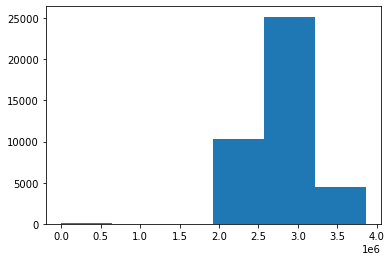

In [42]:
plt.hist('CallerNum',bins=6, data=smile)

## Restored to function counts

In [45]:
smile['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts()

No     8127
Yes    6149
Name: SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), dtype: int64

## Counts by city

In [47]:
smile.CityName.value_counts()

Nashville        6456
Memphis          6304
Murfreesboro     2435
Cleveland        1718
Knoxville        1461
                 ... 
Sharps Chapel       1
Huron               1
Guys                1
Duluth              1
Lakeland            1
Name: CityName, Length: 387, dtype: int64

## Counts by gender

In [48]:
smile['SMILE ON 60+ Demographic Information - Gender'].value_counts()

Female         25018
Male           14580
Transgender       12
Other              1
Name: SMILE ON 60+ Demographic Information - Gender, dtype: int64

## Counts by income level

In [49]:
smile['SMILE ON 60+ Demographic Information - Household Income Level'].value_counts()

$0 - $21 280     28983
$21246-$24280     5220
$24281-$27315     1600
$28806-$32920     1439
$32921-$37035      429
$36366-$41560      191
$41561-$46755      151
$50201-$56475       42
$43926-$50200       40
$51486-$58840       13
$76121-$85635       12
$59046-$67480       11
$58841-$66195        9
$84761-$95355        3
$66606-$76120        3
$67481-$75915        2
Name: SMILE ON 60+ Demographic Information - Household Income Level, dtype: int64

## Was a treatment plan developed?

In [51]:
smile['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'].value_counts()

Yes    15930
No      1098
Name: SMILE ON 60+ Treatment Plan - Was a treatment plan developed?, dtype: int64

## Is the treatment plan completed?

In [50]:
smile['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'].value_counts()

No     12431
Yes     5104
Name: SMILE ON 60+ Treatment Plan - Is the treatment plan completed?, dtype: int64

## Count of Sites

In [52]:
smile['SMILE ON 60+ Site Information - Enroller ID'].value_counts()

Interfaith Dental Clinic - Nashville                                                    5802
Interfaith Dental Clinic - Murfreesboro                                                 3706
Church Health Center - Memphis                                                          3581
Matthew Walker Comprehensive Health Center Inc. - Nashville                             2516
Interfaith Health Clinic of Knoxville - Knoxville                                       1822
Karis Dental Clinic - Cleveland                                                         1809
Friends in Need Health Center - Kingsport                                               1566
Healing Hands Health Center - Bristol                                                   1346
Keystone Dental Care Inc. - Johnson City                                                1032
Christ Community Health Services- Hickory Hill                                           986
Christ Community Health Services- Frayser                             

In [53]:
smile['SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)'].value_counts()

No Code - Denture step Mandibular: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20; No Code - Denture step Maxillary: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20                                                                                                       3925
7140 - Extraction - erupted tooth or exposed root - 15                                                                                                                                                                                                                                                                                                                                    1710
No Code - Denture step Maxillary: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20                                                                                                  